In [47]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

In [48]:
def load_emb_data(file_name):
    # load dict of arrays
    dict_data = np.load(f"../../data/processed/{file_name}.npz")
    # extract the first array
    return dict_data['arr_0']

# load dict of arrays
title_vec = load_emb_data("combine_title")
feature_vec = load_emb_data("combine_feature")
label = load_emb_data("combine_label")
index = load_emb_data("combine_index")

# Inputs and target
inputs = np.hstack([title_vec, feature_vec])
targets = label

Text(0.5, 1.0, 'Labels distribution')

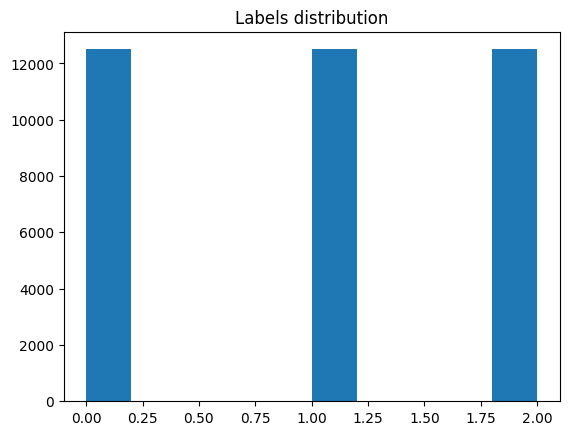

In [13]:
plt.hist(label)
plt.title("Labels distribution")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

# PCA

In [49]:
pca = PCA(n_components=50).fit(X_train)
# Step 1: Linear PCA
X_pca = pca.transform(X_test)

# Step 2: Apply Barnes-Hut t-SNE
tsne = TSNE(n_components=2, method='barnes_hut', random_state=42)
X_tsne = tsne.fit_transform(X_pca)

In [50]:
len(X_tsne)

7500

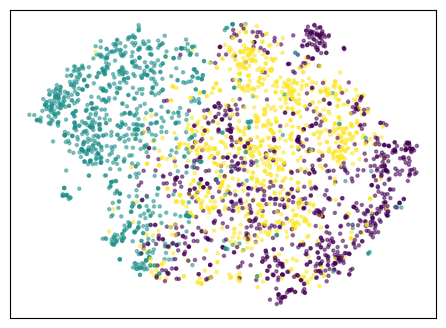

In [66]:
selection = np.random.choice(range(7500), 3000)
# Step 3: Plot the result
plt.figure(figsize=(5.5, 4))
plt.scatter(X_tsne[selection, 0], X_tsne[selection, 1], s=5, alpha=0.5, c=y_test[selection])
# plt.title("t-SNE Visualization Reduced Data", fontsize=13)
plt.xticks([])
plt.yticks([])
plt.savefig("../modeling/images/datareduce", bbox_inches="tight")
plt.show()